<a href="https://colab.research.google.com/github/mengwangk/dl-projects/blob/master/04_09_auto_ml_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated ML - Generate Data

In [0]:
COLAB = True

DATASET_NAME = '4D.zip'

FEATURE_DATASET_PREFIX = 'feature_matrix_snapshot'

ORIG_FEATURE_DATASET_PREFIX = 'feature_matrix_d2_v3'


In [3]:
if COLAB:
  !pip install -U featuretools
  from google.colab import drive
  drive.mount('/content/gdrive')
  !rm -rf dl-projects
  !git clone https://github.com/mengwangk/dl-projects
  !cd dl-projects && ls
else:
  !pip install -U featuretools

     |████████████████████████████████| 245kB 41.3MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=7e54ecd45d6289106759eaf02fe751fb5de1b53d9740fac38ed8d9d898ca47e5
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Found existing installation: featuretools 0.4.1
    Uninstalling featuretools-0.4.1:
      Successfully uninstalled featuretools-0.4.1


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Cloning into 'dl-projects'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 1757 (delta 81), reused 33 (delta 13), pack-reused 1625
Receiving objects: 100% (1757/1757), 76.66 MiB | 35.15 MiB/s, done.
Resolving deltas: 100% (1076/1076), done.
01_01_tensor.ipynb	       04_04_auto_ml_2.ipynb  07_algebra.ipynb
01_02_correlation.ipynb        04_04_auto_ml_3.i

In [0]:
if COLAB:
  !cp dl-projects/utils* .
  !cp dl-projects/preprocess* .

In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import math 
import matplotlib
import re

from scipy import stats
from collections import Counter
from pathlib import Path

plt.style.use('fivethirtyeight')

sns.set(style="ticks")

# Automated feature engineering
import featuretools as ft

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from dateutil.relativedelta import relativedelta

from IPython.display import display

from utils import *
from preprocess import *

# The Answer to the Ultimate Question of Life, the Universe, and Everything.
np.random.seed(42)

In [7]:
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



## Preparation

In [0]:
if COLAB:
  DATASET_PATH = Path("dl-projects/datasets")
else:
  DATASET_PATH = Path("datasets")

DATASET = DATASET_PATH/DATASET_NAME

In [0]:
data = format_tabular(DATASET)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106858 entries, 0 to 106857
Data columns (total 4 columns):
DrawNo       106858 non-null int64
DrawDate     106858 non-null datetime64[ns]
PrizeType    106858 non-null object
LuckyNo      106858 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [11]:
data.tail(24)

,DrawNo,DrawDate,PrizeType,LuckyNo
106834,505219,2019-12-29,SpecialNo9,2528
106835,505320,2020-01-01,1stPrizeNo,875
106836,505320,2020-01-01,2ndPrizeNo,6307
106837,505320,2020-01-01,3rdPrizeNo,8552
106838,505320,2020-01-01,ConsolationNo1,2114
106839,505320,2020-01-01,ConsolationNo10,4861
106840,505320,2020-01-01,ConsolationNo2,508
106841,505320,2020-01-01,ConsolationNo3,2086
106842,505320,2020-01-01,ConsolationNo4,3296
106843,505320,2020-01-01,ConsolationNo5,413


In [0]:
data['NumberId'] = data['LuckyNo']

In [13]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106848,505320,2020-01-01,SpecialNo1,2404,2404
106849,505320,2020-01-01,SpecialNo10,7382,7382
106850,505320,2020-01-01,SpecialNo2,2220,2220
106851,505320,2020-01-01,SpecialNo3,3573,3573
106852,505320,2020-01-01,SpecialNo4,4524,4524
106853,505320,2020-01-01,SpecialNo5,6856,6856
106854,505320,2020-01-01,SpecialNo6,8107,8107
106855,505320,2020-01-01,SpecialNo7,1026,1026
106856,505320,2020-01-01,SpecialNo8,3960,3960
106857,505320,2020-01-01,SpecialNo9,5472,5472


## Data Cleansing

In [0]:
def change_prize_type(x):
  return "Prize"
  # if "Special" in x:
  #   return 'Prize'
  # elif "Consolation" in x:
  #   return 'Prize'
  # else:
  #   return x

def increment_draw_date(x):
  x = x + relativedelta(minutes=1)
  return x

data['PrizeType'] = data['PrizeType'].apply(change_prize_type)

# Add 1 minutes to draw date to avoid overlapping with the cut off date
data['DrawDate'] = data['DrawDate'].apply(increment_draw_date)

In [15]:
data.tail(23)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106835,505320,2020-01-01 00:01:00,Prize,875,875
106836,505320,2020-01-01 00:01:00,Prize,6307,6307
106837,505320,2020-01-01 00:01:00,Prize,8552,8552
106838,505320,2020-01-01 00:01:00,Prize,2114,2114
106839,505320,2020-01-01 00:01:00,Prize,4861,4861
106840,505320,2020-01-01 00:01:00,Prize,508,508
106841,505320,2020-01-01 00:01:00,Prize,2086,2086
106842,505320,2020-01-01 00:01:00,Prize,3296,3296
106843,505320,2020-01-01 00:01:00,Prize,413,413
106844,505320,2020-01-01 00:01:00,Prize,4781,4781


In [16]:
data.describe().round(2)

,DrawNo,LuckyNo,NumberId
count,106858.00,106858.00,106858.00
mean,273049.89,4973.57,4973.57
std,134131.48,2885.58,2885.58
min,40792.00,0.00,0.00
25%,156899.00,2462.00,2462.00
50%,273056.00,4951.00,4951.00
75%,389213.00,7463.00,7463.00
max,505320.00,9999.00,9999.00


Text(0.5, 1.0, 'Draw')

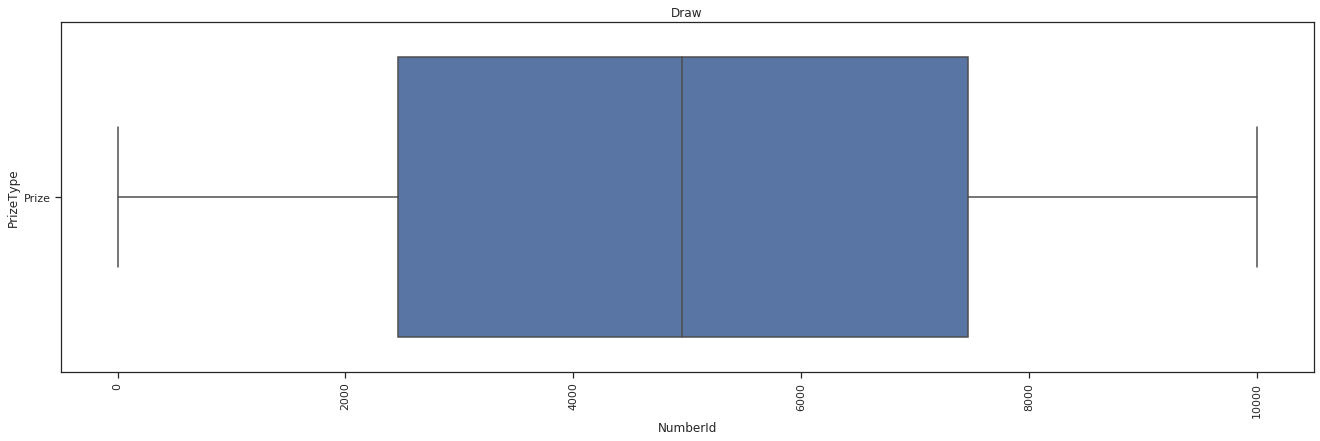

In [17]:
plt.figure(figsize=(20,6))
sns.boxplot(x='NumberId', y='PrizeType',data=data)
plt.xticks(rotation=90)
plt.title('Draw')

# print(data[data['NumberId']==1760])

## Making Labels

In [18]:
data['TotalStrike'] = 1
data.head(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,40792,1992-05-06 00:01:00,Prize,19,19,1
1,40792,1992-05-06 00:01:00,Prize,1124,1124,1
2,40792,1992-05-06 00:01:00,Prize,592,592,1
3,40792,1992-05-06 00:01:00,Prize,5311,5311,1
4,40792,1992-05-06 00:01:00,Prize,407,407,1
5,40792,1992-05-06 00:01:00,Prize,1949,1949,1
6,40792,1992-05-06 00:01:00,Prize,1606,1606,1
7,40792,1992-05-06 00:01:00,Prize,3775,3775,1
8,40792,1992-05-06 00:01:00,Prize,6226,6226,1
9,40792,1992-05-06 00:01:00,Prize,1271,1271,1


In [0]:
def make_cutoffs(start_date, end_date, threshold=0):
    # Find numbers exist before start date
    number_pool = data[data['DrawDate'] < start_date]['NumberId'].unique()
    tmp = pd.DataFrame({'NumberId': number_pool})
   
    # For numbers in the number pool, find their strike count between the start and end dates
    strike_counts = data[(data['NumberId'].isin(number_pool)) & 
        (data['DrawDate'] >= start_date) & 
        (data['DrawDate']< end_date)
    ].groupby('NumberId')['TotalStrike'].count().reset_index()
    
    number_of_draws = data[
                 (data['DrawDate'] >= start_date) & 
                 (data['DrawDate']< end_date)]['DrawDate'].nunique()
    # display(strike_counts)
    # print(number_of_draws)
    
    # Merge with all the number ids to record all customers who existed before start date
    strike_counts = strike_counts.merge(tmp, on='NumberId', how='right')
    
    # Set the total for any numbers who did not strike in the timeframe equal to 0
    strike_counts['TotalStrike'] = strike_counts['TotalStrike'].fillna(0)
    
    # Label is based on the threshold
    strike_counts['Label'] = (strike_counts['TotalStrike'] > threshold).astype(int)
        
    # The cutoff time is the start date
    strike_counts['cutoff_time'] = pd.to_datetime(start_date)
    strike_counts = strike_counts[['NumberId', 'cutoff_time', 'TotalStrike', 'Label']]
    
    #display(strike_counts[strike_counts['Label']==1].nunique())
    #display(strike_counts.sort_values(by='TotalStrike', ascending=False))
   
    return number_of_draws, strike_counts

In [0]:
TARGET_MONTH_YEAR = pd.datetime(2019,12,1)

In [0]:
# For testing purpose
data = data[data['DrawDate'] < TARGET_MONTH_YEAR]

In [32]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
106503,503819,2019-11-30 00:01:00,Prize,8329,8329,1
106504,503819,2019-11-30 00:01:00,Prize,7187,7187,1
106505,503819,2019-11-30 00:01:00,Prize,5140,5140,1
106506,503819,2019-11-30 00:01:00,Prize,3515,3515,1
106507,503819,2019-11-30 00:01:00,Prize,6690,6690,1
106508,503819,2019-11-30 00:01:00,Prize,753,753,1
106509,503819,2019-11-30 00:01:00,Prize,7,7,1
106510,503819,2019-11-30 00:01:00,Prize,3337,3337,1
106511,503819,2019-11-30 00:01:00,Prize,2383,2383,1
106512,503819,2019-11-30 00:01:00,Prize,6692,6692,1


In [34]:
end_month_year = TARGET_MONTH_YEAR +  relativedelta(months=1)
end_month_year

datetime.datetime(2020, 1, 1, 0, 0)

In [36]:
number_of_draws, target_month_year = make_cutoffs(TARGET_MONTH_YEAR, end_month_year)
print(number_of_draws, len(target_month_year))
target_month_year[(target_month_year['Label']==1) & (target_month_year['TotalStrike']==2)].sort_values(by='TotalStrike', ascending=False).head()

0 10000


,NumberId,cutoff_time,TotalStrike,Label


In [37]:
data[data['NumberId'].isin([135,2513,5030])]

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
6255,67894,1994-01-27 00:01:00,Prize,2513,2513,1
6994,71194,1994-04-14 00:01:00,Prize,5030,5030,1
9126,80394,1994-11-13 00:01:00,Prize,2513,2513,1
11857,92295,1995-08-19 00:01:00,Prize,2513,2513,1
16285,111596,1996-11-10 00:01:00,Prize,2513,2513,1
19202,124197,1997-08-31 00:01:00,Prize,135,135,1
40002,214703,2003-04-05 00:01:00,Prize,5030,5030,1
46671,243705,2005-01-04 00:01:00,Prize,2513,2513,1
50329,259605,2005-12-10 00:01:00,Prize,2513,2513,1
55421,281707,2007-03-25 00:01:00,Prize,5030,5030,1


Text(0.5, 1.0, 'Label Distribution for Target Month Year')

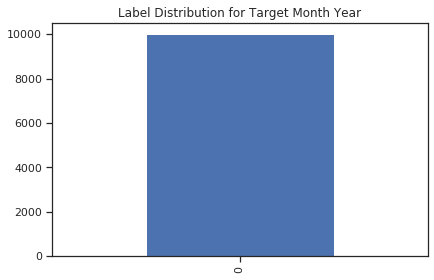

In [40]:
target_month_year['Label'].value_counts().plot.bar()
plt.title('Label Distribution for Target Month Year')

In [0]:
CUT_OFF_YEAR = TARGET_MONTH_YEAR

In [42]:
## Loop through each month starting from CUT_OFF_YEAR

# print(data['DrawDate'].max())
max_year_month = data['DrawDate'].max() - relativedelta(months=1) + relativedelta(day=31)
print(f"Max month year: {max_year_month}")

start_year_month = CUT_OFF_YEAR

months_data = []
total_draws = 0
while start_year_month < max_year_month:
    start_date = start_year_month 
    end_date = start_date + relativedelta(months=1)
    start_year_month = start_year_month + relativedelta(months=1)
    print(f"Labels from {start_date} to {end_date}")
    draw_count, month_data = make_cutoffs(start_date, end_date)
    total_draws = total_draws + draw_count
    months_data.append(month_data)

print(f"Total draws: {total_draws}")
print(f"Total draws: {data[(data['DrawDate'] >= CUT_OFF_YEAR) & (data['DrawDate'] <= max_year_month)]['DrawDate'].nunique()}")
print(f"Total months:{len(months_data)}")
print(f"Total records count: {sum([len(l) for l in months_data])}")
print([len(l) for l in months_data])

Max month year: 2019-10-31 00:01:00
Total draws: 0
Total draws: 0
Total months:0
Total records count: 0
[]


In [0]:
labels = pd.concat(months_data)
labels.to_csv(DATASET_PATH/'labels.csv')
labels.describe()

In [0]:
labels[(labels['NumberId'] == 9016)  & (labels['Label'] > 0)]

In [0]:
labels.loc[labels['NumberId'] == 9016].set_index('cutoff_time')['TotalStrike'].plot(figsize = (6, 4), linewidth = 3)
plt.xlabel('Date', size = 16); 
plt.ylabel('Total Strike', size = 16); 
plt.title('Draw', size = 20);
plt.xticks(size = 16); plt.yticks(size = 16);

In [0]:
labels.tail(10)

## Automated Feature Engineering

In [0]:
es = ft.EntitySet(id="Lotto Results")

# Add the entire data table as an entity
es.entity_from_dataframe("Results",
                         dataframe=data,
                         index="results_index",
                         time_index = 'DrawDate')

es['Results']

In [0]:
es.normalize_entity(new_entity_id="Numbers",
                    base_entity_id="Results",
                    index="NumberId",
                    )

In [0]:
es

In [0]:
es['Numbers'].df.head(24)

In [0]:
es['Results'].df.head(24)

In [0]:
len(es['Results'].df)

## Deep Feature Synthesis

In [0]:
# feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
#                                         cutoff_time = labels, verbose = 2,
#                                         cutoff_time_in_index = True,
#                                         chunk_size = len(labels), n_jobs = 1,
#                                         max_depth = 1)
print(ft.__version__)
ft.list_primitives().T

In [0]:
# default_agg_primitives =  ['std', 'max', 'min', 'mode', 'mean', 'skew', 'last', 'avg_time_between', 
#                            'count', 'sum', 'trend', 'percent_true', 'num_unique', 'time_since_last', 
#                            'time_since_first']
# default_trans_primitives =  ['cum_sum', 'cum_mean', 'month', 'day', 'percentile', 
#                               'time_since', 'time_since_previous', 'cum_min', 'cum_max']

default_agg_primitives =  ['std', 'max', 'min', 'mode', 'mean', 'skew', 'last', 'avg_time_between', 
                           'count', 'sum', 'trend', 'percent_true', 'num_unique']
default_trans_primitives =  ['cum_sum', 'cum_mean', 'month', 'day', 'percentile', 
                            'and', 'time_since', 'time_since_previous']

feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
                                        agg_primitives = default_agg_primitives ,
                                        trans_primitives = default_trans_primitives,
                                        cutoff_time = labels, verbose = 1,
                                        cutoff_time_in_index = True,
                                        chunk_size = len(labels), n_jobs = 1,
                                        #chunk_size = 10000, n_jobs = -1,
                                        max_depth = 2)

In [0]:
len(feature_matrix.columns), feature_matrix.columns

In [0]:
len(feature_matrix)

In [0]:
feature_matrix.head().T

In [0]:
feature_matrix.shape

In [0]:
feature_matrix.head(2)

In [0]:
#feature_matrix[(feature_matrix['NumberId']==0) & (feature_matrix['Label']==1)].head(10)

## Correlations

In [0]:
# Save the original feature matrix
origin_feature_matrix = feature_matrix

feature_matrix = pd.get_dummies(feature_matrix).reset_index()
feature_matrix.shape

In [0]:
feature_matrix.head(10)

In [0]:
corrs = feature_matrix.corr().sort_values('TotalStrike')
corrs['TotalStrike'].head()

In [0]:
corrs['TotalStrike'].dropna().tail(60)

In [0]:
feature_matrix['month'] = feature_matrix['time'].dt.month
feature_matrix['year'] = feature_matrix['time'].dt.year

In [0]:
feature_matrix.info()

In [0]:
feature_matrix.head()

In [0]:
feature_matrix.tail()

In [0]:
display(feature_matrix.describe())

## Save feature matrix

In [0]:
# https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
if COLAB:
    GDRIVE_DATASET_FOLDER = Path('gdrive/My Drive/datasets/')
    #!ls /content/gdrive/My\ Drive/
    feature_matrix.to_feather(GDRIVE_DATASET_FOLDER/f"{FEATURE_DATASET_PREFIX}.ft")
    origin_feature_matrix.to_pickle(GDRIVE_DATASET_FOLDER/f"{FEATURE_DATASET_PREFIX}_origin.pkl")

In [0]:
if COLAB:
  !cd gdrive/"My Drive"/datasets/ && ls -l --block-size=M

### Validation